In [1]:
# univariate cnn lstm example
import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.layers import Conv1D
from tensorflow.layers import MaxPooling1D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Dividimos la seuencia en muestras
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el fin del patron
        end_ix = i + n_steps
        # Verificar si estamos fuera de la secuencia
        if end_ix > len(sequence)-1:
            break
        # Reunimo las partes correspondientes a inputs y outputs del patron
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])
in_seq1= pd.Series((data['Max'] - data['Max'].mean())/ (data['Max'].max() - data['Max'].min())).values
in_seq2= pd.Series((data['Volumen'] - data['Volumen'].mean())/ (data['Volumen'].max() - data['Volumen'].min())).values

In [14]:
# define input sequence
out_seq = array([in_seq1[i+1] for i in range(len(in_seq1)-1)])
out_seq=out_seq
in_seq1=in_seq1[:-1]
in_seq2=in_seq2[:-1]

In [15]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [16]:
np.shape(in_seq2)

(9417, 1)

In [17]:
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

In [18]:
# choose a number of time steps
n_steps = 3

In [27]:
# convert into input/output
X, y = split_sequence(dataset[:-50], n_steps)
X_test, y_test = split_sequence(dataset[-50:], n_steps)

In [30]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

In [31]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [33]:
y_out=model.predict(X_test, verbose=0)

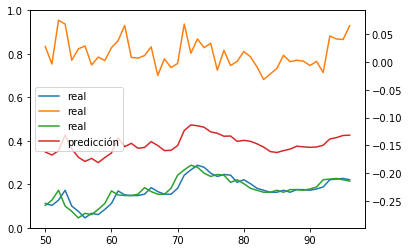

In [35]:
fig, ax = plt.subplots()
ax = ax.twinx()
#ax.plot(y_raw[-100:], label='train')
ax.plot(np.arange(47)+50,y_test, label='real')
ax.plot(np.arange(47)+50,y_out,label='predicción')
ax.legend()
plt.show()

In [52]:
N=[]
vp2=[]
for t in range (0,np.shape(y_out)[0]-1):
    if (np.sign([y_test[t+1][2]-y_test[t][2]])*np.sign([y_out[t+1]-y_test[t][2]]))>0:
        vp2.append(1)
        N.append(1)
    else:
        N.append(1)
MDA=1/sum(N)*sum(vp2)

In [56]:
MDA

0.45652173913043476

In [58]:
X_test[0]

array([[-0.28330622,  0.01327285, -0.27025758],
       [-0.27025758, -0.00725347, -0.2678851 ],
       [-0.2678851 ,  0.01590443, -0.25483646]])